## Final Project Submission

Please fill out:
* Student name: Ismael Araujo
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Problem

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. 

<strong>Your team is charged with exploring what type of films are currently doing the best at the box office</strong>. You must then translate those findings into actionable <strong>insights</strong> that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# 1. Importing Libraries and Datasets

### 1.1 Import libraries

In [259]:
# Install xlrd to use the read_excel method
!pip install xlrd

# Import libraries
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

### 1.2 Import files needed to investigate the data

In [261]:
# Import files that I'll need to investigate the data

df_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip')
df_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip')
df_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip')
df_imdb = pd.read_excel('zippedData/movies_metadata.xlsx')
df_movies = pd.read_excel('zippedData/IMDb-movies.xlsx')
# This will force Pandas to show all the DataFrame rows
pd.set_option('display.max_columns', None)

### Findings:

- One of the data sets is taking a few seconds to load. I'll filter out the irrelevant data to improve the speed.

### Next Steps:

- Start investigating the DataFrames.

# 2. Data Wrangling

- Open the DataFrames and understand their dimensions and what type of data is available

Note: The cells in this section DOES NOT affect other sections of the this notebook.

### 2.1 imdb.title.basics.csv imported as df_basics

In [176]:
# Start investigating the data sets using .head(1) to see only the first row of the DataFrame
df_basics.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


In [177]:
# Using .shape to see understand the DataFrame's dimmensions
df_basics.shape

(146144, 6)

### 2.2 imdb.title.ratings.csv  imported as df_ratings

In [178]:
df_ratings.head(1)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31


In [179]:
df_ratings.shape

(73856, 3)

### 2.3 imdb.title.ratings.csv.gz imported as df_akas

In [180]:
df_akas.head(1)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0


In [181]:
df_akas.shape

(331703, 8)

### 2.4 movies_metadata.xlsx imported as df_imdb

In [182]:
df_imdb.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,190269,tt0020217,en,New York Nights,Show girl Jill Deverne is married to song writ...,0.657513,/8Af9KCVMLXY9baR5CfilAms9OT2.jpg,"[{'name': 'Joseph M. Schenck Production', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2029-12-28,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,New York Nights,False,0.0,0


In [183]:
df_imdb.shape

(30379, 24)

### 2.5 IMDb-movies.xlsx imported as df_movies

In [184]:
df_movies.head(1)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0


In [185]:
df_movies.shape

(85854, 22)

### Findings:

- The data I need is spread in multiple DataFrames
- The IMDb data sets have an ID number, which will help me to merge my data sets together
- There are multiple columns that I will not need and multiple rows with empty values
- The df_movies and df_imdb DataFrames is taking a few seconds to load

### Next Steps:

- Since Microsoft is an American company, I decided to use movies produced by American studios

# 3. Cleaning the Data

- Rename columns
- Set new indexes
- Merge DataFrames
- Remove data that I will not need

### 3.1 Rename Columns

- Create a pattern between the DataFrames that contains a columns with an IMDb ID number and have name them imdb_id

In [186]:
# Use .rename to rename columns
df_basics.rename(columns={'tconst':'imdb_id'}, inplace=True)
df_akas.rename(columns={'title_id':'imdb_id'}, inplace=True)
df_ratings.rename(columns={'tconst':'imdb_id'}, inplace=True)
df_movies.rename(columns={'imdb_title_id':'imdb_id'}, inplace=True)

### 3.2 Set and match indexes
- Set all the imdb_id columns as index. It will help when these DataFrames are merged together

In [187]:
# Use .set_index to set imdb_id as the new index
df_basics.set_index('imdb_id', inplace=True)
df_ratings.set_index('imdb_id', inplace=True)
df_akas.set_index('imdb_id', inplace=True)
df_imdb.set_index('imdb_id', inplace=True)
df_movies.set_index('imdb_id', inplace=True)

### 3.3 Join DataFrames
- Join all the DataFrames

In [188]:
# Joining the df_basics and df_akas dataframes. 'df_ba' stands for DataFrame Basics & Akas
df_ba = df_basics.join(df_akas)
df_ba.head(1)

,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
imdb_id,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1.0,Sangharsh,IN,hi,NaN,alternative transliteration,0.0


In [189]:
# Joining the df_ba and df_ratings dataframes. 'bar' stands for DataFrame Basics, Akas & Ratings
df_bar = df_ba.join(df_ratings)
df_bar.head(1)

,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
imdb_id,,,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1.0,Sangharsh,IN,hi,NaN,alternative transliteration,0.0,7.0,77.0


### 3.4 Drop all movies that weren't produced by studios in the US

Note: Since Microsoft is an American company and the US is the largest market for movies, I will work only with movies produced in the US.

In [190]:
# Using print(x.shape) to see the dimmensions of more than one DataFrame at once
print(df_bar.shape)
# Checking the size of the DataFrame if I filter all the rows that don't contain 'US' under region
print(df_bar[df_bar.region == 'US'].shape)

(355545, 14)
(51490, 14)


In [191]:
# Filtering out all rows that don't contain 'US' under 'region'
df_bar = df_bar[df_bar.region == 'US']
# Checking the shape. It matches to what was predicted in the cell above
df_bar.shape

(51490, 14)

In [192]:
print(df_bar.shape)
print(df_movies.shape)
# Checking the size of the DataFrame if I filter all the rows that don't contain 'USA' under country
print(df_movies[df_movies.country == 'USA'].shape)

(51490, 14)
(85854, 21)
(28510, 21)


In [193]:
# Filtering out all rows that don't contain 'US' under 'region'
df_movies = df_movies[df_movies.country == 'USA']
df_movies.shape

(28510, 21)

In [194]:
# Joining df_movies and df_bar and using rsuffic to avoid conflicts between columns with the same name
df_mbar = df_movies.join(df_bar,rsuffix='_bar')

In [195]:
# Checking if it worked
df_mbar.head(1)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,primary_title,original_title_bar,start_year,runtime_minutes,genres,ordering,title_bar,region,language_bar,types,attributes,is_original_title,averagerating,numvotes
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# Checking the size of the DataFrame
df_mbar.shape

(30303, 35)

Note: the df_imdb has multiple columns with the same name as df_bar. Thus, I create another dataframe with the values that I will need before merging it with my df_bar dataframe.

In [197]:
# Create new dataframe with the columns that are relevant. df_br stands for DataFrame Budget & Revenue
df_br = df_imdb.filter(['imdb_id','budget','revenue'], axis=1)
df_br.head(1)

,budget,revenue
imdb_id,,
tt0020217,0,0


In [198]:
# This DataFrame will be the main one. using rsuffix to avoid conflict between columns with the same name
df = df_mbar.join(df_br,rsuffix='_br')
df.head(1)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,primary_title,original_title_bar,start_year,runtime_minutes,genres,ordering,title_bar,region,language_bar,types,attributes,is_original_title,averagerating,numvotes,budget_br,revenue
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Add data to NaN values 

The objective is to use fillna to add values to rows with NaN values

In [199]:
# Checking null values in the DataFrame
df.isna().sum()

title                        1
original_title               1
year                         0
date_published               0
genre                        0
duration                     0
country                      0
language                   362
director                    34
writer                     208
production_company        1200
actors                      26
description                 76
avg_vote                     0
votes                        0
budget                   18822
usa_gross_income         21951
worlwide_gross_income    21714
metascore                22777
reviews_from_users         324
reviews_from_critics      1966
primary_title            21114
original_title_bar       21114
start_year               21114
runtime_minutes          21356
genres                   21114
ordering                 21114
title_bar                21114
region                   21114
language_bar             30080
types                    28299
attributes               29639
is_origi

In [200]:
# Using .fillna() to replace null values with values from another columns
df.budget.fillna(df.budget_br,inplace=True)
df.worlwide_gross_income.fillna(df.revenue,inplace=True)
df.budget_br.fillna(df.budget,inplace=True)
df.revenue.fillna(df.worlwide_gross_income,inplace=True)
df.genres.fillna(df.genre,inplace=True)
df.usa_gross_income .fillna(df.worlwide_gross_income,inplace=True)

In [201]:
# Checking if fillna() worked
df.isna().sum()

title                        1
original_title               1
year                         0
date_published               0
genre                        0
duration                     0
country                      0
language                   362
director                    34
writer                     208
production_company        1200
actors                      26
description                 76
avg_vote                     0
votes                        0
budget                   15199
usa_gross_income         18079
worlwide_gross_income    18693
metascore                22777
reviews_from_users         324
reviews_from_critics      1966
primary_title            21114
original_title_bar       21114
start_year               21114
runtime_minutes          21356
genres                       0
ordering                 21114
title_bar                21114
region                   21114
language_bar             30080
types                    28299
attributes               29639
is_origi

Great! Now we have only movies produced by American studios available for analysis. 

### Drop columns

Note: I decided to drop the columns 'primary_title' and 'original_title' because their meanings sound ambiguos. The columns 'title' sounds more straight forward.

In [202]:
df.columns

Index(['title', 'original_title', 'year', 'date_published', 'genre',
       'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'primary_title',
       'original_title_bar', 'start_year', 'runtime_minutes', 'genres',
       'ordering', 'title_bar', 'region', 'language_bar', 'types',
       'attributes', 'is_original_title', 'averagerating', 'numvotes',
       'budget_br', 'revenue'],
      dtype='object')

In [203]:
# Droping unnecessary data
df.drop(columns=['original_title','director','writer','actors','description',\
                 'primary_title','original_title_bar','start_year','language','ordering',\
                 'title_bar','region','language_bar','types','attributes','is_original_title',\
                 'budget_br','revenue','runtime_minutes','numvotes','votes', 'reviews_from_users',\
                 'reviews_from_critics','averagerating'
                 
                ], inplace=True)

In [204]:
df.head(1)

,title,year,date_published,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres
imdb_id,,,,,,,,,,,,,
tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,Alexander Black Photoplays,5.9,NaN,NaN,NaN,NaN,Romance


In [205]:
df.shape

(30307, 13)

In [206]:
# Drop duplicated indexes
df = df[~df.index.duplicated(keep='last')]

In [207]:
# Checking new shape of the DataFrame
df.shape

(28510, 13)

## Exploring the data
- New movies throughout the year

### First visualization 
- Use data visualization tools to have a better understanding of the datasets and if there are outliers that could break the analysis.



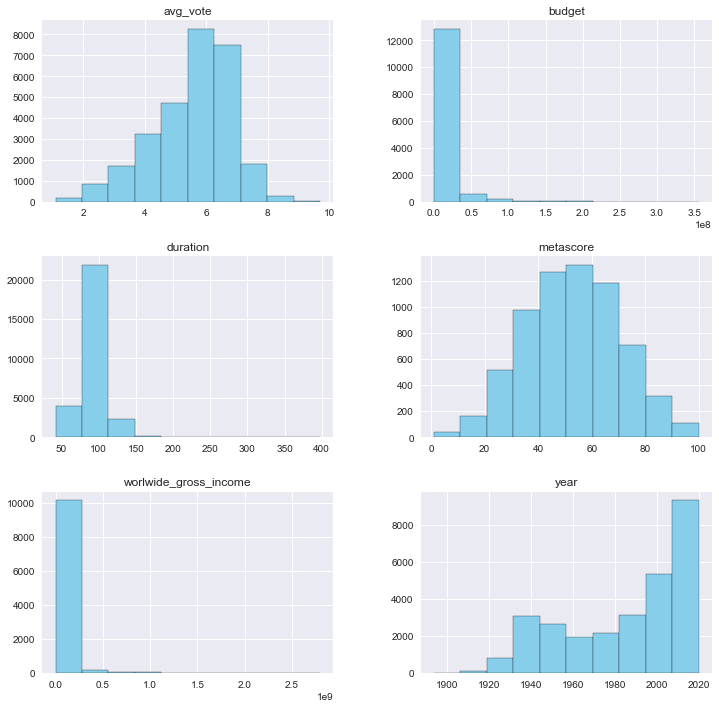

In [208]:
# Using a DataFrame histogram plot to better visualize the dimentions of the values in the DataFrame
df.hist(color='skyblue',edgecolor='black',figsize= (12,12));

In [209]:
# Checking mu columns dtypes
df.dtypes

title                     object
year                       int64
date_published            object
genre                     object
duration                   int64
country                   object
production_company        object
avg_vote                 float64
budget                   float64
usa_gross_income          object
worlwide_gross_income    float64
metascore                float64
genres                    object
dtype: object

In [210]:
# Converting the 'year' columns to type(int)
df.year.astype(int)

imdb_id
tt0000009     1894
tt0002101     1912
tt0002199     1912
tt0003167     1914
tt0003471     1913
tt0003643     1914
tt0003657     1914
tt0003772     1914
tt0003973     1914
tt0004099     1914
tt0004134     1915
tt0004181     1914
tt0004457     1914
tt0004465     1914
tt0004635     1914
tt0004681     1914
tt0004707     1914
tt0004743     1914
tt0004766     1914
tt0004825     1914
tt0004838     1914
tt0004872     1915
tt0004873     1915
tt0004972     1915
tt0005060     1915
tt0005078     1915
tt0005149     1915
tt0005339     1915
tt0005402     1915
tt0005557     1915
tt0005719     1915
tt0005809     1915
tt0005960     1915
tt0006327     1915
tt0006333     1916
tt0006509     1916
tt0006517     1915
tt0006589     1916
tt0006688     1916
tt0006731     1916
tt0006736     1916
tt0006745     1916
tt0006753     1916
tt0006780     1916
tt0006809     1916
tt0006826     1916
tt0006864     1916
tt0007047     1916
tt0007257     1916
tt0007260     1916
tt0007338     1916
tt0007340     1916
tt00

### Use only movies launched between 1990 and 2020

In the 1990s, there was a <a href='https://theface.com/culture/do-the-right-thing-to-the-matrix-how-the-nineties-changed-cinema-forever'>revolution in the movie industry that changed the sector forever</a>. With new techlogies, we could create movies in CGI. It was a new era to the movies. Thus, I will use only movies launched during and after the 1990s.

In [211]:
# Checking the timeframe of my DataFrame
print(df.year.min())
print(df.year.max())

1894
2020


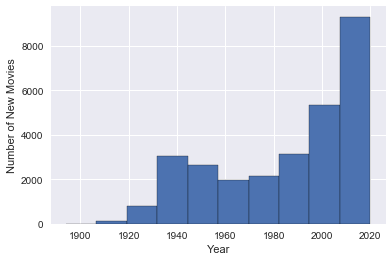

In [212]:
# Creating a histogram with the start_year columns
x = df.year
plt.hist(x, bins=10,edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of New Movies')
plt.show()

In [213]:
# Filtering my DataFrame to only have movies launched between 1990 and 2020
df = df[df.year >= 1990]
print(df.year.min())
print(df.year.max())

1990
2020


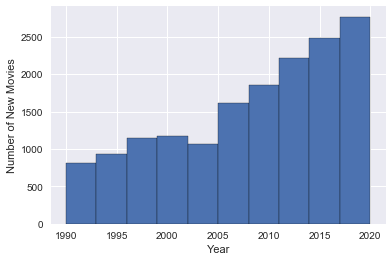

In [214]:
# Plotting a histogram to visualize when the movies were launched
x = df.year
plt.hist(x, bins=10,edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of New Movies')
plt.show()

## Genres With The Highest Release Of Movies

### Objectives:
- Answer my fisrt question: What genres have the highest release of movies between 1990 and 2020
- Drop NaN values from the genres column
- Separate the genre columns that contains more that one genre
- Create a visualization to visualize the findings

In [215]:
# A look at the DataFrame
df.head(1)

,title,year,date_published,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres
imdb_id,,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,2002-03-01 00:00:00,"Comedy, Fantasy, Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy, Fantasy, Romance"


In [216]:
# Checking the shape of the DataFrame to make easier to compare the percentage of null values in each colums
df.shape

(16051, 13)

In [217]:
# Droping rows with missing values in the genres column
df.dropna(subset=['genres'], inplace=True)  

In [218]:
# Checking if there are null values under genres
df.isna().sum()

title                        0
year                         0
date_published               0
genre                        0
duration                     0
country                      0
production_company         869
avg_vote                     0
budget                    6035
usa_gross_income          7565
worlwide_gross_income     7611
metascore                10847
genres                       0
dtype: int64

Now that the null values under the genres columns is deleted, I noticed that there are movies with more than one genre. I'll separate them to three columns. I'll use these columns to create a dictionary which will show me how many movies were launched for each value.

In [219]:
# Separanting the genres columns into three genres using the comma as a dividing point
df[['genre_1','genre_2','genre_3']] =  df.genres.str.split(',',expand=True,)
df.head(1)

,title,year,date_published,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3
imdb_id,,,,,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,2002-03-01 00:00:00,"Comedy, Fantasy, Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy, Fantasy, Romance",Comedy,Fantasy,Romance


In [220]:
# Counting null values in the new genres columns
print(df.genre_1.isna().sum())
print(df.genre_2.isna().sum())
print(df.genre_3.isna().sum())

0
4760
9887


Awesome. The genres are separated.

In [221]:
# Using groupby to turn the new genres columns into a dictionary
genre_1 = dict(df.groupby(['genre_1']).size())
genre_2 = dict(df.groupby(['genre_2']).size())
genre_3 = dict(df.groupby(['genre_3']).size())

In [222]:
# Using Counter to sum the dictionary values together
genres_dict = dict(Counter(genre_1)+Counter(genre_2)+Counter(genre_3))
genres_dict

{'Action': 2428,
 'Adventure': 829,
 'Animation': 332,
 'Biography': 325,
 'Comedy': 5092,
 'Crime': 1320,
 'Documentary': 3,
 'Drama': 5373,
 'Family': 449,
 'Fantasy': 380,
 'History': 69,
 'Horror': 2638,
 'Music': 138,
 'Musical': 78,
 'Mystery': 608,
 'Romance': 911,
 'Sci-Fi': 623,
 'Sport': 104,
 'Thriller': 2001,
 'War': 63,
 'Western': 105,
 ' Action': 56,
 ' Adventure': 391,
 ' Animation': 1,
 ' Biography': 14,
 ' Comedy': 564,
 ' Crime': 674,
 ' Drama': 2183,
 ' Family': 403,
 ' Fantasy': 375,
 ' History': 63,
 ' Horror': 633,
 ' Music': 168,
 ' Musical': 50,
 ' Mystery': 492,
 ' Romance': 1347,
 ' Sci-Fi': 497,
 ' Sport': 176,
 ' Thriller': 1415,
 ' War': 63,
 ' Western': 66,
 'Game-Show': 1,
 'News': 3,
 'Reality-TV': 1,
 'Short': 1}

In [223]:
# Setting up x and y values using the dictionaries keys and values
x2 = genres_dict.keys()
y2 = genres_dict.values()

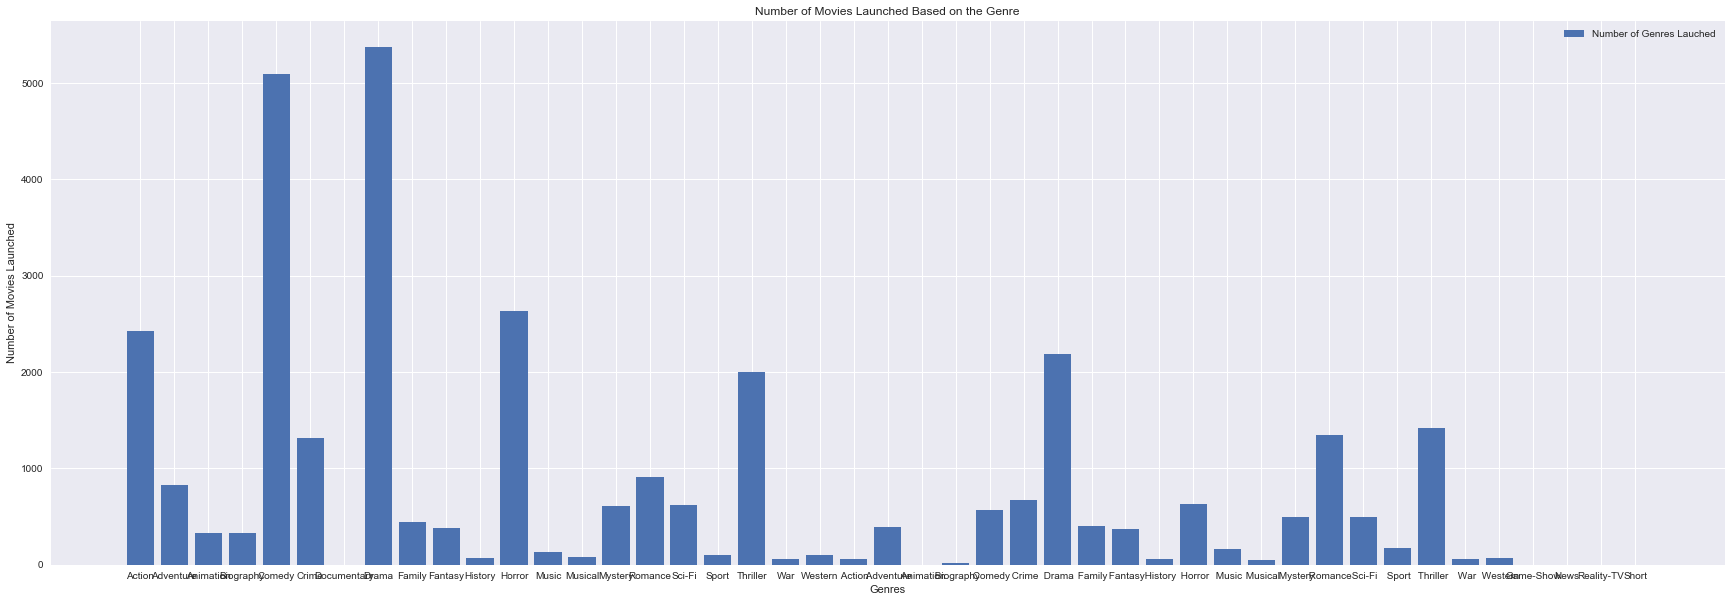

In [224]:
# Defining the figure size
plt.figure(figsize=(30,10))

# Using the bar() function to create a plot using the above values of x and y; and creating a label
plt.bar(x2,y2, label='Number of Genres Lauched')

# Creating x and y labels
plt.xlabel('Genres')
plt.ylabel('Number of Movies Launched')

# Creating a title to the label
plt.title('Number of Movies Launched Based on the Genre')
plt.legend()

# Final plot
plt.show()

Since there are so many different genres, I will plot the most popular genres.

In [225]:
# Using Counter to check the largest values in my genres dictionary
k = Counter(genres_dict) 
  
# Finding 15 highest values using most_commom
genres_count = k.most_common(15)  

# Printing the top 15 most produced movies genres
print("The top 15 most produced movie genres and number of movies\nof each genre launched between 2010 and 2020:\n") 

# Using for loop to print the list in a more readable format
for x,y in genres_count: 
    print(x,'-',y) 

The top 15 most produced movie genres and number of movies
of each genre launched between 2010 and 2020:

Drama - 5373
Comedy - 5092
Horror - 2638
Action - 2428
 Drama - 2183
Thriller - 2001
 Thriller - 1415
 Romance - 1347
Crime - 1320
Romance - 911
Adventure - 829
 Crime - 674
 Horror - 633
Sci-Fi - 623
Mystery - 608


Now, I will plot the top 10 genres with more movies launched.

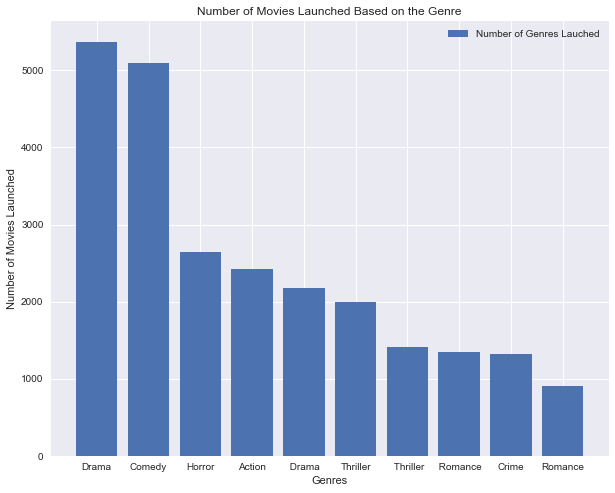

In [226]:
# Creating a variable using most_common and then converting it into a dictionary
top_10_genres = k.most_common(10)  
top_10_genres = dict(top_10_genres)

# Setting x and y up
x3 = top_10_genres.keys()
y3 = top_10_genres.values()

# Setting the figure size
plt.figure(figsize=(10,8))

# Using the bar() function to create a plot using the above values of x and y; and create labels
plt.bar(x3,y3, label='Number of Genres Lauched')
plt.xlabel('Genres')
plt.ylabel('Number of Movies Launched')

plt.title('Number of Movies Launched Based on the Genre')
plt.legend()

# Output the final plot
plt.show()

### Findings:

- The top 15 genres have the highest release of movies between 1990 and 2020 are Drama, Documentary, Comedy, Horror, Thriller, Action, Biography, Adventure, Romance, Crime, History, Family, Mystery, Sci-Fi, and Music.



### Next Steps:

- Find out which are the most profitable genres

## Correlation between a higher budget and higher profits

Note: Accordly to <a href='https://theweek.com/articles/647394/when-buy-movie-ticket-where-does-that-money'>this article</a>, studios get approximately 60% of the box office in the US. Thus, I will remove 40% of the final profit.

In [227]:
# Checking the columns that I will use so that I decide with columns I will be using
df.columns

Index(['title', 'year', 'date_published', 'genre', 'duration', 'country',
       'production_company', 'avg_vote', 'budget', 'usa_gross_income',
       'worlwide_gross_income', 'metascore', 'genres', 'genre_1', 'genre_2',
       'genre_3'],
      dtype='object')

In [228]:
# First, I want to take a look of the top budget movies
df.nlargest(5, 'budget')

,title,year,date_published,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3
imdb_id,,,,,,,,,,,,,,,,
tt4154796,Avengers: Endgame,2019,2019-04-24 00:00:00,"Action, Adventure, Drama",181,USA,Marvel Studios,8.4,356000000.0,858373000,2.797801e+09,78.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
tt4154756,Avengers: Infinity War,2018,2018-04-25 00:00:00,"Action, Adventure, Sci-Fi",149,USA,Marvel Studios,8.4,321000000.0,678815482,2.048360e+09,68.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
tt2527336,Star Wars - Gli ultimi Jedi,2017,2017-12-13 00:00:00,"Action, Adventure, Fantasy",152,USA,Walt Disney Pictures,7.0,317000000.0,620181382,1.332540e+09,84.0,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
tt0449088,Pirati dei Caraibi - Ai confini del mondo,2007,2007-05-23 00:00:00,"Action, Adventure, Fantasy",169,USA,Walt Disney Pictures,7.1,300000000.0,309420425,9.609965e+08,50.0,"Action, Adventure, Fantasy",Action,Adventure,Fantasy
tt2527338,Star Wars: L'ascesa di Skywalker,2019,2019-12-18 00:00:00,"Action, Adventure, Fantasy",141,USA,Walt Disney Pictures,6.6,275000000.0,515202542,1.074144e+09,53.0,"Action,Adventure,Fantasy",Action,Adventure,Fantasy


In [229]:
# Dropping NaN values from the budget and worlwide_gross_income columns
df.dropna(subset=['budget','worlwide_gross_income'], inplace=True)  

In [230]:
# Checking the shape of the dataset after I have dropped the NaN values
df.shape

(7705, 16)

In [231]:
# Dropping budget values that are equal to 0
df = df[df['budget'] != 0]

In [232]:
# Checking the shape of the dataset after I have dropped the 0 values
df.shape

(4670, 16)

In [233]:
# Create column profit. Profit will be worlwide_gross_income minus budget
df['profit'] = (df['worlwide_gross_income'] - df['budget'])

In [234]:
df.head()

,title,year,date_published,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3,profit
imdb_id,,,,,,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,2002-03-01 00:00:00,"Comedy, Fantasy, Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy, Fantasy, Romance",Comedy,Fantasy,Romance,28019048.0
tt0097176,Deceit,1990,1992-08-21 00:00:00,"Comedy, Sci-Fi",90,USA,21st Century Film Corporation,4.8,25000.0,0,0.0,NaN,"Comedy, Sci-Fi",Comedy,Sci-Fi,None,-25000.0
tt0098375,I figli del fuoco,1990,1990-02-23 00:00:00,"Horror, Sci-Fi, Thriller",97,USA,Black Owl Productions,4.8,5500000.0,50367,50367.0,NaN,"Horror, Sci-Fi, Thriller",Horror,Sci-Fi,Thriller,-5449633.0
tt0098987,Le avventure di Ford Fairlane,1990,1990-07-11 00:00:00,"Action, Adventure, Comedy",104,USA,Twentieth Century Fox,6.5,20000000.0,21413502,21413502.0,24.0,"Action, Adventure, Comedy",Action,Adventure,Comedy,1413502.0
tt0099005,Air America,1990,1990-08-10 00:00:00,"Action, Comedy, War",113,USA,Carolco Pictures,5.8,35000000.0,31053601,33461269.0,33.0,"Action, Comedy, War",Action,Comedy,War,-1538731.0


<strong>IMPORTANT:</strong> Studios only take 60% of the sales tickets revenue. Thus, I am removing 40% of each value under the world_gross_income column.

In [235]:
# This lambda function takes each value under the column 'profit' and multiplies it by 0.6.
df['profit'] = df['profit'].apply(lambda x : x*0.6 if x > 0 else x)

In [236]:
df.head()

,title,year,date_published,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3,profit
imdb_id,,,,,,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,2002-03-01 00:00:00,"Comedy, Fantasy, Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy, Fantasy, Romance",Comedy,Fantasy,Romance,16811428.8
tt0097176,Deceit,1990,1992-08-21 00:00:00,"Comedy, Sci-Fi",90,USA,21st Century Film Corporation,4.8,25000.0,0,0.0,NaN,"Comedy, Sci-Fi",Comedy,Sci-Fi,None,-25000.0
tt0098375,I figli del fuoco,1990,1990-02-23 00:00:00,"Horror, Sci-Fi, Thriller",97,USA,Black Owl Productions,4.8,5500000.0,50367,50367.0,NaN,"Horror, Sci-Fi, Thriller",Horror,Sci-Fi,Thriller,-5449633.0
tt0098987,Le avventure di Ford Fairlane,1990,1990-07-11 00:00:00,"Action, Adventure, Comedy",104,USA,Twentieth Century Fox,6.5,20000000.0,21413502,21413502.0,24.0,"Action, Adventure, Comedy",Action,Adventure,Comedy,848101.2
tt0099005,Air America,1990,1990-08-10 00:00:00,"Action, Comedy, War",113,USA,Carolco Pictures,5.8,35000000.0,31053601,33461269.0,33.0,"Action, Comedy, War",Action,Comedy,War,-1538731.0


In [237]:
# Making sure that the worlwide_gross_income and profit columns are integers
df.worlwide_gross_income.astype(int)
df.profit.astype(int)
df.head(1)

,title,year,date_published,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3,profit
imdb_id,,,,,,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,2002-03-01 00:00:00,"Comedy, Fantasy, Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy, Fantasy, Romance",Comedy,Fantasy,Romance,16811428.8


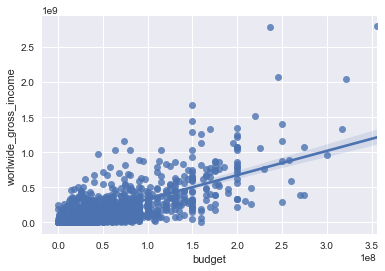

In [238]:
# Using a scatter plot to see the relation between budget and profits
ax = sns.regplot(x="budget", y="worlwide_gross_income",data=df)

In [239]:
# Analysing the correlation between budget and profits
budget_revenue_corr = df.budget.corr(df.worlwide_gross_income)
budget_revenue_corr

0.7720767188901728

<strong>Takeaways:</strong> We can say that a higher budget has a strong positive correlation with higher profits.

## Other correlations

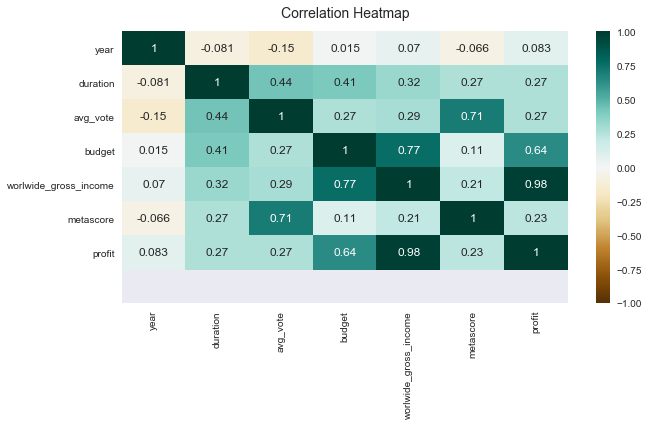

In [240]:
# Increase the size of the heatmap
plt.figure(figsize=(10, 5))
# Store the heatmap variable to use easily when applying other features
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',annot_kws={"size": 12})
# This fixes a randoring problem on the top and bottom of the heatmap
plt.ylim([8,0])
plt.style.use('seaborn')
# Adding a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=14);

# Most Profitable Genres

- Find the most profitable individual genre and group of genres - net and per dollar invested

Note: The profit column values represent the  subtraction of the values in the worlwide_gross_income column by the values under the budget column minus 40%, which is the the revenue margin destinated to the movie theaters.

### Make a copy of the main DataFrame

In [241]:
# Using .head() to take a look at the DataFrame
df.head()

,title,year,date_published,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3,profit
imdb_id,,,,,,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,2002-03-01 00:00:00,"Comedy, Fantasy, Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy, Fantasy, Romance",Comedy,Fantasy,Romance,16811428.8
tt0097176,Deceit,1990,1992-08-21 00:00:00,"Comedy, Sci-Fi",90,USA,21st Century Film Corporation,4.8,25000.0,0,0.0,NaN,"Comedy, Sci-Fi",Comedy,Sci-Fi,None,-25000.0
tt0098375,I figli del fuoco,1990,1990-02-23 00:00:00,"Horror, Sci-Fi, Thriller",97,USA,Black Owl Productions,4.8,5500000.0,50367,50367.0,NaN,"Horror, Sci-Fi, Thriller",Horror,Sci-Fi,Thriller,-5449633.0
tt0098987,Le avventure di Ford Fairlane,1990,1990-07-11 00:00:00,"Action, Adventure, Comedy",104,USA,Twentieth Century Fox,6.5,20000000.0,21413502,21413502.0,24.0,"Action, Adventure, Comedy",Action,Adventure,Comedy,848101.2
tt0099005,Air America,1990,1990-08-10 00:00:00,"Action, Comedy, War",113,USA,Carolco Pictures,5.8,35000000.0,31053601,33461269.0,33.0,"Action, Comedy, War",Action,Comedy,War,-1538731.0


In [242]:
# Making a copy of the the main DataFrame in case something goes wrong
df_genre_mean = df.copy()

In [243]:
# Checking if the copy was successful
df_genre_mean.head()

,title,year,date_published,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3,profit
imdb_id,,,,,,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,2002-03-01 00:00:00,"Comedy, Fantasy, Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy, Fantasy, Romance",Comedy,Fantasy,Romance,16811428.8
tt0097176,Deceit,1990,1992-08-21 00:00:00,"Comedy, Sci-Fi",90,USA,21st Century Film Corporation,4.8,25000.0,0,0.0,NaN,"Comedy, Sci-Fi",Comedy,Sci-Fi,None,-25000.0
tt0098375,I figli del fuoco,1990,1990-02-23 00:00:00,"Horror, Sci-Fi, Thriller",97,USA,Black Owl Productions,4.8,5500000.0,50367,50367.0,NaN,"Horror, Sci-Fi, Thriller",Horror,Sci-Fi,Thriller,-5449633.0
tt0098987,Le avventure di Ford Fairlane,1990,1990-07-11 00:00:00,"Action, Adventure, Comedy",104,USA,Twentieth Century Fox,6.5,20000000.0,21413502,21413502.0,24.0,"Action, Adventure, Comedy",Action,Adventure,Comedy,848101.2
tt0099005,Air America,1990,1990-08-10 00:00:00,"Action, Comedy, War",113,USA,Carolco Pictures,5.8,35000000.0,31053601,33461269.0,33.0,"Action, Comedy, War",Action,Comedy,War,-1538731.0


### Create a new data frame

A new DataFrame will be used to easily access the mean values for the genres groups. The new DataFrame will have values divided by 1,000,000. The objective is to make the readness easy to be done.

In [244]:
# This code allows pandas to show all the rows
pd.set_option('display.max_rows', None)
# Group data by genre and get mean for each genre and each variable, divide by 1 million for better visibility
df_genre_mean = df_genre_mean.groupby(['genres']).mean()
df_genre_mean ['profit_million'] = df_genre_mean['profit']/1000000
df_genre_mean['return_per_dollar'] = df_genre_mean['profit']/df_genre_mean['budget']
# Delete the 'profit' column
del df_genre_mean['profit']
df_genre_mean['worlwide_gross_income'] = df_genre_mean['worlwide_gross_income']/1000000
# Delete the 'worlwide_gross_income' column
del df_genre_mean['worlwide_gross_income']
df_genre_mean['budget_million'] = df_genre_mean['budget']/1000000
# Delete the 'budget' column
del df_genre_mean['budget']
# Delete the 'year' column
del df_genre_mean['year']

In [245]:
# Checking if the new DataFrame is working properly
df_genre_mean.head()

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genres,,,,,,
Action,97.454545,4.281818,28.000000,-4.064060,-0.820179,4.955091
"Action, Adventure",103.500000,5.450000,65.000000,178.076408,1.720545,103.500000
"Action, Adventure, Comedy",99.512821,5.656410,48.281250,33.668795,0.673134,50.017949
"Action, Adventure, Crime",103.750000,5.350000,39.571429,2.597463,0.057466,45.200000
"Action, Adventure, Drama",115.000000,6.290000,58.416667,24.097712,0.441350,54.600000


### Most profitable group of genres (net)

In [246]:
# Sorting values by the profit_million column. It's in descending order.
df_genre_mean.sort_values(by=['profit_million'],ascending=False).head(10)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genres,,,,,,
"Family,Fantasy,Musical",129.000000,7.100000,65.000000,662.438628,4.140241,160.000000
"Action,Adventure,Sci-Fi",132.096774,6.867742,58.451613,396.308685,2.179452,181.838710
"Adventure,Drama,Fantasy",112.250000,5.675000,60.250000,294.262765,3.926121,74.950000
"Action, Fantasy",92.000000,6.400000,49.000000,287.666057,1.917774,150.000000
"Adventure, Sci-Fi, Thriller",116.000000,6.500000,73.000000,283.123871,2.144878,132.000000
"Action, Adventure, Fantasy",122.388889,5.900000,47.466667,247.316344,2.733029,90.491667
"Action,Adventure,Fantasy",117.294118,6.317647,51.375000,239.213392,1.503930,159.058824
"Action, Drama, Music",129.000000,6.300000,39.000000,231.604044,9.264162,25.000000
"Adventure,Animation,Comedy",95.148936,6.659574,59.382979,228.178981,1.883458,121.148936


### Return per dollar invested

In [250]:
df_genre_mean.sort_values(by=['return_per_dollar'],ascending=False).head(10)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genres,,,,,,
"Adventure, Drama, Horror",79.0,5.700000,63.000000,32.510092,65.020184,0.500000
"Action,Comedy,Musical",76.0,4.000000,NaN,0.014464,13.148727,0.001100
"Drama,Horror,Sci-Fi",90.0,5.866667,74.000000,64.704960,10.991783,5.886667
"Action, Drama, Music",129.0,6.300000,39.000000,231.604044,9.264162,25.000000
"Action,Drama,Romance",106.0,6.400000,72.000000,0.093561,5.503588,0.017000
"Drama,Sci-Fi,Thriller",91.0,5.166667,69.000000,22.523886,5.115190,4.403333
"Biography, Comedy, Romance",87.0,5.400000,36.000000,0.288982,4.816360,0.060000
"Horror,Mystery,Thriller",91.6,5.037500,43.586207,37.857616,4.678285,8.092200
"Adventure,Horror,Mystery",93.0,6.200000,38.000000,22.139045,4.427809,5.000000


### Most profitable individual genres (net)

In [251]:
s = df['genre'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genre'
del df['genre']
df_genres_splited = df.join(s)

In [252]:
df_genres_splited.head(5)

,title,year,date_published,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3,profit,genre
imdb_id,,,,,,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,2002-03-01 00:00:00,118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy, Fantasy, Romance",Comedy,Fantasy,Romance,16811428.8,Comedy
tt0035423,Kate & Leopold,2001,2002-03-01 00:00:00,118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy, Fantasy, Romance",Comedy,Fantasy,Romance,16811428.8,Fantasy
tt0035423,Kate & Leopold,2001,2002-03-01 00:00:00,118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy, Fantasy, Romance",Comedy,Fantasy,Romance,16811428.8,Romance
tt0097176,Deceit,1990,1992-08-21 00:00:00,90,USA,21st Century Film Corporation,4.8,25000.0,0,0.0,NaN,"Comedy, Sci-Fi",Comedy,Sci-Fi,None,-25000.0,Comedy
tt0097176,Deceit,1990,1992-08-21 00:00:00,90,USA,21st Century Film Corporation,4.8,25000.0,0,0.0,NaN,"Comedy, Sci-Fi",Comedy,Sci-Fi,None,-25000.0,Sci-Fi


In [253]:
# This code allows pandas to show all the rows
pd.set_option('display.max_rows', None)
# Group data by genre and get mean for each genre and each variable, divide by 1 million for better visibility
df_mean_per_genre = df_genres_splited.groupby(['genre']).mean()
df_mean_per_genre ['profit_million'] = df_mean_per_genre['profit']/1000000
df_mean_per_genre['return_per_dollar'] = df_mean_per_genre['profit']/df_mean_per_genre['budget']
# Delete the 'profit' column
del df_mean_per_genre['profit']
df_mean_per_genre['worlwide_gross_income'] = df_mean_per_genre['worlwide_gross_income']/1000000
# Delete the 'worlwide_gross_income' column
del df_mean_per_genre['worlwide_gross_income']
df_mean_per_genre['budget_million'] = df_mean_per_genre['budget']/1000000
# Delete the 'budget' column
del df_mean_per_genre['budget']
# Delete the 'year' column
del df_mean_per_genre['year']

In [254]:
# Checking if my new DataFrame is working properly
df_mean_per_genre.head()

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
Action,89.594595,6.618919,61.678571,84.613531,1.165318,72.609822
Adventure,105.297297,6.217199,55.591954,140.612313,1.579787,89.007121
Biography,125.944444,6.900000,55.437500,23.385291,0.710259,32.925000
Comedy,96.751101,5.900220,50.567335,59.792868,1.254655,47.656830
Crime,102.391304,5.901512,48.580737,10.402696,0.423428,24.567783


In [255]:
# Sorting the value by the 'profit_million column'
df_mean_per_genre.sort_values(by=['profit_million'],ascending=False).head(10)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
Adventure,105.297297,6.217199,55.591954,140.612313,1.579787,89.007121
Animation,89.460733,6.449215,60.675000,124.593940,1.563503,79.688986
Action,89.594595,6.618919,61.678571,84.613531,1.165318,72.609822
Sci-Fi,104.574830,5.659524,50.743455,71.728524,1.373894,52.208207
Comedy,96.751101,5.900220,50.567335,59.792868,1.254655,47.656830
Fantasy,103.305344,5.796183,47.581633,50.384785,1.273269,39.571190
Family,95.916667,5.091667,45.333333,49.507192,2.399379,20.633333
Action,105.531320,5.675280,47.538591,48.413058,1.074904,45.039431
Family,97.414179,5.665299,47.305263,28.636035,0.848063,33.766402


In [258]:
df_mean_per_genre.sort_values(by=['return_per_dollar'],ascending=False).head(10)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
Family,95.916667,5.091667,45.333333,49.507192,2.399379,20.633333
Sci-Fi,93.388889,4.161111,55.333333,3.853732,1.788966,2.154167
Horror,92.111842,4.718750,43.427419,10.678837,1.613393,6.618869
Adventure,105.297297,6.217199,55.591954,140.612313,1.579787,89.007121
Animation,89.460733,6.449215,60.675000,124.593940,1.563503,79.688986
Mystery,104.352941,6.005882,64.833333,20.897399,1.503785,13.896529
Sci-Fi,104.574830,5.659524,50.743455,71.728524,1.373894,52.208207
Fantasy,103.305344,5.796183,47.581633,50.384785,1.273269,39.571190
Comedy,96.751101,5.900220,50.567335,59.792868,1.254655,47.656830


In [257]:
df_mean_per_genre.sort_values(by=['return_per_dollar'],ascending=True).head(10)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
Western,88.833333,4.633333,49.000000,-2.178632,-0.988038,2.205008
Sport,102.000000,5.700000,NaN,-2.847800,-0.949267,3.000000
Musical,121.666667,7.566667,48.000000,-3.183943,-0.734756,4.333333
Music,82.250000,7.225000,61.000000,-2.811142,-0.584437,4.810000
War,116.523810,6.116667,52.741935,-1.468565,-0.075047,19.568571
Thriller,91.212121,4.745455,37.500000,-0.157021,-0.048105,3.264091
History,128.348485,6.566667,54.981481,7.711596,0.215266,35.823629
Crime,106.405099,6.178187,54.722467,6.518948,0.400541,16.275344
Sport,108.610687,6.195420,50.636364,9.059247,0.410614,22.062681


In [82]:
# Split genres and create a new entry for each of the genre a movie falls into
# s = df['genres'].str.split(',').apply(Series, 1).stack()
# s.index = s.index.droplevel(-1)
# s.name = 'genres'
# del df['genres']
# df_genres_splited = df.join(s)

In [83]:
# This code allows pandas to show all the rows
# pd.set_option('display.max_rows', None)
# # Group data by genre and get mean for each genre and each variable, divide by 1 million for better visibility
# df_genre_mean = df_genres_splited.groupby(['genres']).mean()
# df_genre_mean ['profit_million'] = df_genre_mean['profit']/1000000
# df_genre_mean['return_per_dollar'] = df_genre_mean['profit']/df_genre_mean['budget']
# # Delete the 'profit' column
# del df_genre_mean['profit']
# df_genre_mean['worlwide_gross_income'] = df_genre_mean['worlwide_gross_income']/1000000
# # Delete the 'worlwide_gross_income' column
# del df_genre_mean['worlwide_gross_income']
# df_genre_mean['budget_million'] = df_genre_mean['budget']/1000000
# # Delete the 'budget' column
# del df_genre_mean['budget']
# # Delete the 'year' column
# del df_genre_mean['year']

In [84]:
# x4 = top_10_genre.keys()
# y4 = top_10_genre.values()

# plt.figure(figsize=(10,6))

# # Use the bar() function to create a plot using the above values of x and y. Add a label.
# plt.bar(x3,y3, label='Number of Genres Lauched')

# plt.xlabel('Genres')
# plt.ylabel('Number of Movies Launched')

# plt.title('Number of Movies Launched Based on the Genre')
# plt.legend()

# # Output the final plot
# plt.show()

In [85]:
# df_genre_mean.corr()

In [86]:
# df_genre_mean.shape

In [87]:
# scatter_plot_title = 'Relationship Between Budget and Box Office'
# profit_plt_label = 'Profit'
# budget_plt_label = 'Box Office'

# tackle_figure, ax = plt.subplots(figsize=(10, 8))
# x_p = df.budget
# y_p = df.profit
# ax.set_title(scatter_plot_title)
# ax.set_xlabel(profit_plt_label)
# ax.set_ylabel(budget_plt_label)

# ax.scatter(x_p,y_p)